In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')
from settings import *
from fermiqp.lattice import *
import matplotlib.colors as colors

from fermiqp_style import set_theme
set_theme()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 780 and 1550 lattices

In [20]:
wvl = 780e-9


In [43]:
U = power2freq(power=3,
               waist=40e-6,
               wavelen=1.064e-6)
freq2temp(U)


7.226222367303576e-05

In [44]:
U = power2freq(power=3,
                waist=40e-6,
                wavelen=1.064*1e-6)
freq2temp(U)

7.226222367303576e-05

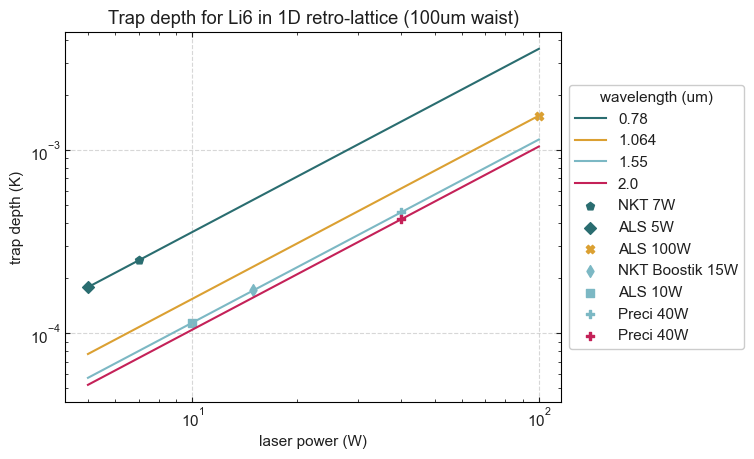

In [82]:
power_single_beam = np.linspace(5,100,100)


for wvl in [0.78,1.064,1.550,2.0]:
        waist = 100e-6
        eta_boost = 4

        U = power2freq(power=power_single_beam,
                waist=waist,
                wavelen=wvl*1e-6)*eta_boost

        plt.loglog(power_single_beam,
                 freq2temp(U),
                 '-',
                 label=wvl)


laser = [[7,0.78,"NKT 7W",'p',"C0"],
         [5,0.78,"ALS 5W",'D',"C0"],
        [100,1.064,"ALS 100W","X","C1"],
        [15,1.55,"NKT Boostik 15W",'d',"C2"],
        [10,1.55,"ALS 10W",'s',"C2"],
        [40,1.55,"Preci 40W",'P',"C2"],
        [40,2.0,"Preci 40W",'P',"C3"],
]

for l in laser:
        plt.scatter(l[0],freq2temp(power2freq(power=l[0],
                waist=waist,
                wavelen=l[1]*1e-6)*eta_boost),label=l[2],
                marker=l[3],
                color=l[4])
# plt.legend(title='wavelength (um)')
plt.ylabel('trap depth (K)')
plt.xlabel('laser power (W)')
plt.grid()
plt.title('Trap depth for Li6 in 1D retro-lattice (100um waist)')
plt.gca().legend(title='wavelength (um)',loc='center left', bbox_to_anchor=(1, 0.5))

In [19]:
lattice_780.U

1

0.7273803743093543


Text(0, 0.5, 'Trap frequency (uK)')

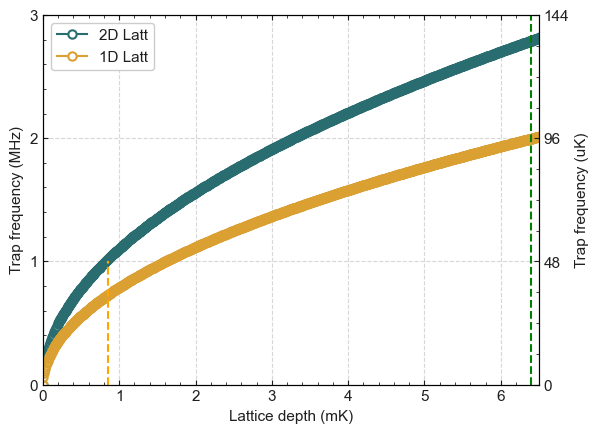

In [5]:
pinn = OpticalLattice1D(a=752e-9)
pinn1d = OpticalLattice1D(a=532e-9)

P = np.linspace(0,80,1000) # power: watts

t = 0.91
eta_boost = (t+t**3+t**5+t**7)**2
U = power2freq(power=P, waist=60e-6) * eta_boost

# U = np.linspace(0,140,1000) * 1e6

resx = lambda x: freq2temp(x)*1e3
resy = lambda x: freq2temp(x)*1e3
resy = lambda x: x*1e-6
# U = 34.6e6
y = pinn.trap_freq(U)

plt.plot(resx(U), resy(y), label='2D Latt')


y = pinn1d.trap_freq(U*2.25/8.79)

print(y[np.argmin(np.abs(U-temp2freq(0.85e-3)))]*1e-6)
plt.plot(resx(U), resy(y), label='1D Latt')


plt.grid()

plt.legend()
plt.xlabel('Lattice depth (mK)')
plt.ylabel('Trap frequency (MHz)')

# plt.yticks()
plt.xlim([0,6.5])

yticks = np.arange(4)
plt.yticks(yticks)
plt.ylim([0,3])

# plt.vlines(1.6, 0, 3, color='green', ls='--')
plt.vlines(6.4, 0, 3, color='green', ls='--')
plt.vlines(0.85, 0, 1, color='orange', ls='--')

plt.twinx()

plt.yticks(np.round(freq2temp(yticks*1e6)*1e6))
plt.ylim([0.,freq2temp(3*1e6)*1e6])
plt.ylabel('Trap frequency (uK)')